In [1]:
import os
os.sys.path

['c:\\Users\\vinay\\Desktop\\SIG\\Soil Classification',
 'c:\\Program Files\\Python312\\python312.zip',
 'c:\\Program Files\\Python312\\DLLs',
 'c:\\Program Files\\Python312\\Lib',
 'c:\\Program Files\\Python312',
 '',
 'C:\\Users\\vinay\\AppData\\Roaming\\Python\\Python312\\site-packages',
 'C:\\Users\\vinay\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32',
 'C:\\Users\\vinay\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32\\lib',
 'C:\\Users\\vinay\\AppData\\Roaming\\Python\\Python312\\site-packages\\Pythonwin',
 'c:\\Program Files\\Python312\\Lib\\site-packages']

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import scipy
from scipy import optimize

In [3]:
img = image.load_img("basedata/red_soil.jpeg")

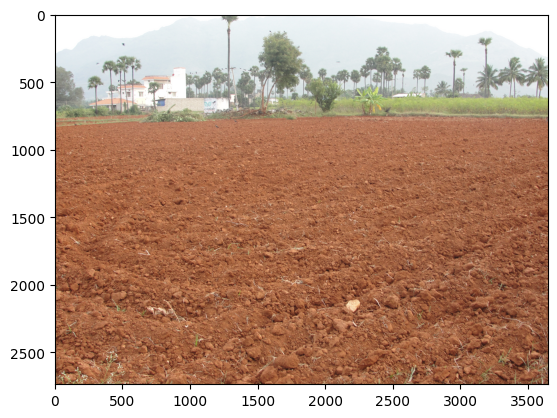

In [4]:
plt.imshow(img)

In [5]:
cv2.imread("basedata/red_soil.jpeg")

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 76, 119, 186],
        [ 73, 116, 183],
        [ 76, 118, 185],
        ...,
        [ 53,  84, 135],
        [ 53,  85, 138],
        [ 50,  84, 137]],

       [[ 73, 115, 184],
        [ 71, 113, 182],
        [ 72, 113, 182],
        ...,
        [ 56,  84, 138],
        [ 55,  87, 140],
        [ 51,  82, 137]],

       [[ 65, 107, 178],
        [ 65, 107, 178],
        [ 68, 108, 180],
        ...,
        [ 55,  82, 138],
        [ 59,  88, 145],
        [ 57,  85, 145]]

In [6]:
cv2.imread("basedata/red_soil.jpeg").shape

(2736, 3648, 3)

In [7]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [8]:
train_dataset = train.flow_from_directory("basedata/train/",
                                          target_size = (200,200),
                                          batch_size = 32,
                                          class_mode = 'categorical')

validation_dataset = train.flow_from_directory("basedata/validation/",
                                          target_size = (200,200),
                                          batch_size = 32,
                                          class_mode = 'categorical')

Found 156 images belonging to 5 classes.


Found 156 images belonging to 5 classes.


In [9]:
train_dataset.class_indices

{'Black Soil': 0,
 'Cinder Soil': 1,
 'Peat Soil': 2,
 'Red Soil': 3,
 'Yellow Soil': 4}

In [10]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16, (3,3), activation = "relu", input_shape= (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32, (3,3), activation = "relu"),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(5,activation= 'softmax')
                                   ])


c:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.compile(loss= 'categorical_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [16]:
history = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 50,
                      validation_data = validation_dataset)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 624ms/step - accuracy: 1.0000 - loss: 0.0912 - val_accuracy: 0.9808 - val_loss: 0.0776
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step - accuracy: 0.9583 - loss: 0.0977 - val_accuracy: 0.9359 - val_loss: 0.2065
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 466ms/step - accuracy: 0.9808 - loss: 0.0933 - val_accuracy: 0.9808 - val_loss: 0.1007
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 359ms/step - accuracy: 0.9792 - loss: 0.0988 - val_accuracy: 0.9038 - val_loss: 0.2279
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 460ms/step - accuracy: 0.9597 - loss: 0.1147 - val_accuracy: 0.9295 - val_loss: 0.1676
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 359ms/step - accuracy: 0.9167 - loss: 0.1701 - val_accuracy: 0.8526 - val_loss: 0.3303
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step - accuracy: 0.9385 - loss: 0.2087 - val_accuracy: 0.7628 - val_loss: 0.4498
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 404ms/step - accuracy: 0.7604 - loss: 0.4662 - val_accuracy: 0.9295 - val_loss:

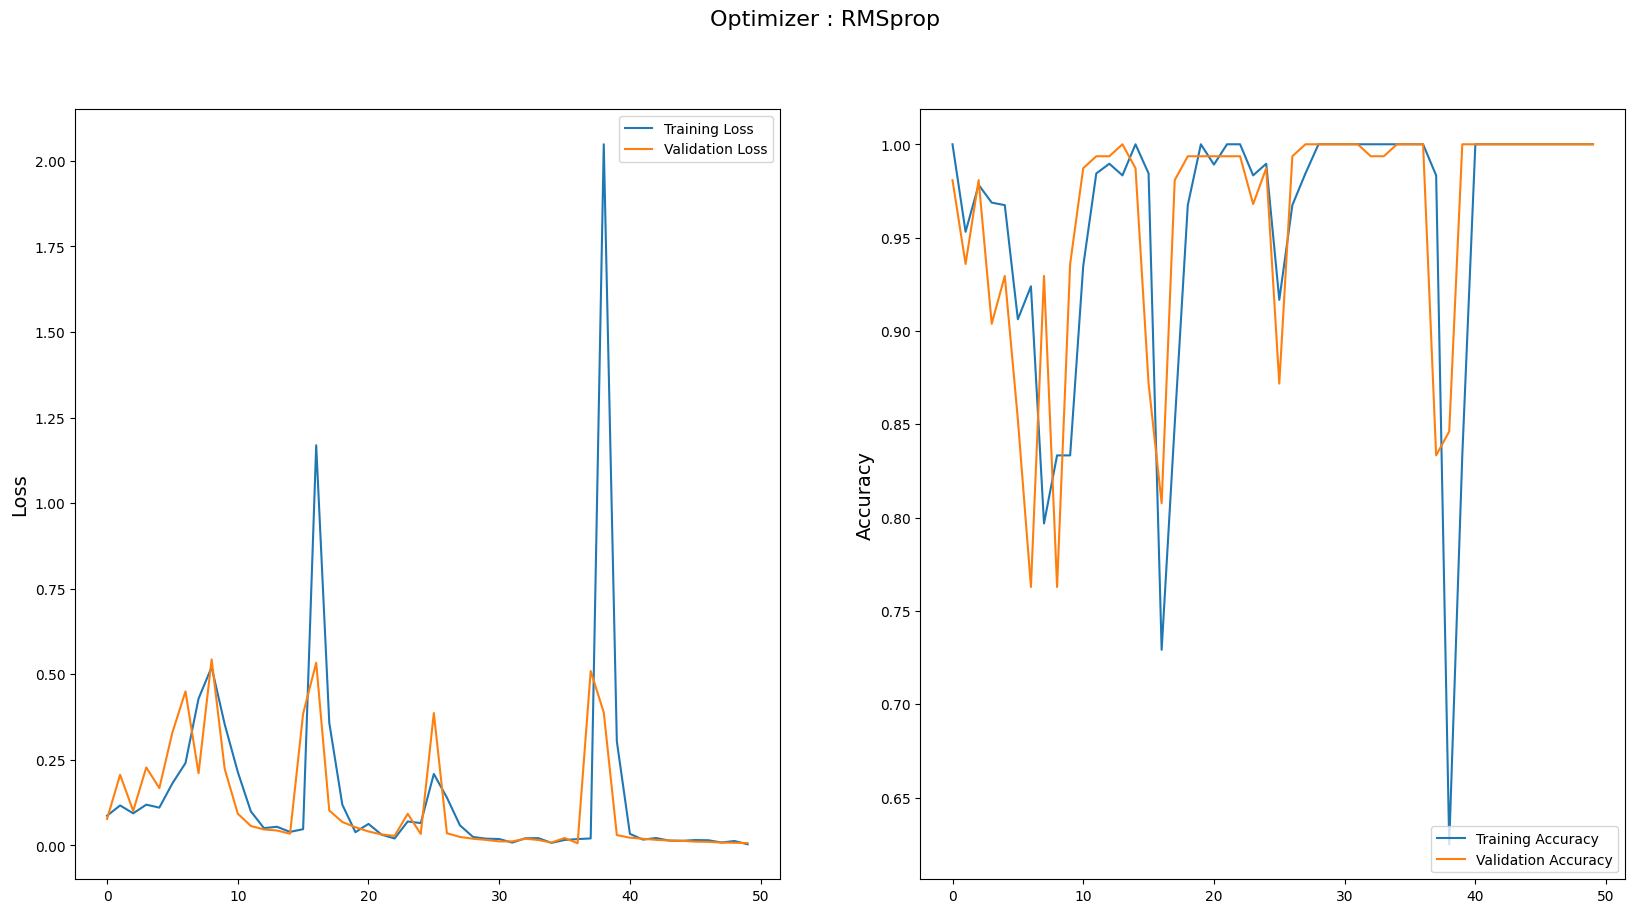

In [17]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : RMSprop', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=14)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

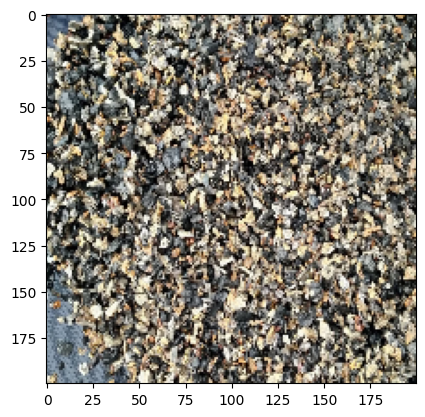

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1-tpl1.webp: Cinder Soil


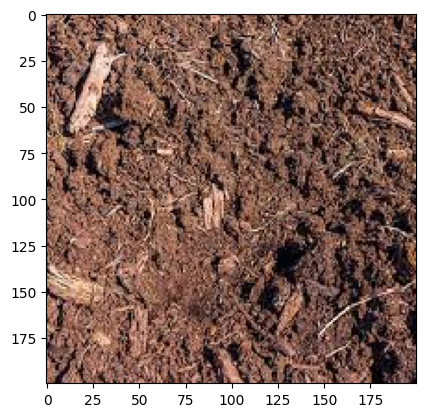

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
p-soil.jpg: Peat Soil


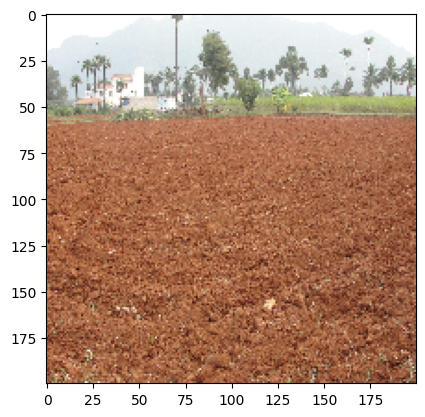

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
red_soil.jpeg: Red Soil


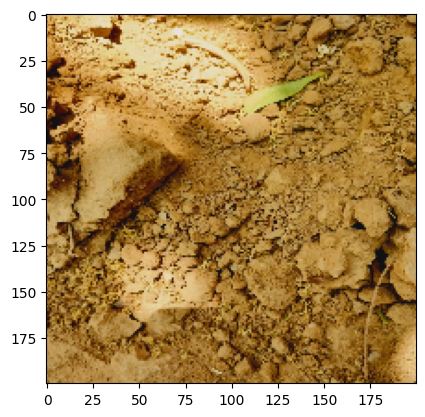

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
yellow-soil-1.webp: Yellow Soil


In [21]:
dir_path = 'basedata/test'

for i in os.listdir(dir_path):
    img_path = os.path.join(dir_path, i)
    img = image.load_img(img_path, target_size=(200, 200, 3))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])

    val = model.predict(images)
    val = np.argmax(val)

    if val == 0:
        print(f'{i}: Black Soil')
    elif val == 1:
        print(f'{i}: Cinder Soil')
    elif val == 2:
        print(f'{i}: Peat Soil')
    elif val == 3:
        print(f'{i}: Red Soil')
    elif val == 4:
        print(f'{i}: Yellow Soil')


# 